In [132]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from collections import Counter
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import warnings
warnings.simplefilter("ignore")

In [133]:
data = pd.read_csv("OJ.csv")
np.random.seed(1)
data

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,CH,237,1,1.75,1.99,0.00,0.00,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,CH,239,1,1.75,1.99,0.00,0.30,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,CH,245,1,1.86,2.09,0.17,0.00,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,MM,227,1,1.69,1.69,0.00,0.00,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,CH,228,7,1.69,1.69,0.00,0.00,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1065,CH,252,7,1.86,2.09,0.10,0.00,0,0,0.587822,2.09,1.76,0.33,Yes,0.000000,0.053763,0.23,0
1066,CH,256,7,1.86,2.18,0.00,0.00,0,0,0.670258,2.18,1.86,0.32,Yes,0.000000,0.000000,0.32,0
1067,MM,257,7,1.86,2.18,0.00,0.00,0,0,0.736206,2.18,1.86,0.32,Yes,0.000000,0.000000,0.32,0
1068,CH,261,7,1.86,2.13,0.00,0.24,0,0,0.588965,1.89,1.86,0.03,Yes,0.112676,0.000000,0.27,0


##### Question 1.Create a training set containing a random sample of 800 observations, and a test set containing the remaining observations.

In [134]:
trainIndex = np.random.choice(data.shape[0], size=800,replace=False)
train = data.iloc[trainIndex]
test = data.iloc[~data.index.isin(trainIndex)]
features = X_train.columns

#### Question 2.  Fit a tree to the training data, with Purchase as the response and the other variablesas predictors. Describe the results obtained. What is the training error rate? How manyterminal nodes does the tree have?

In [135]:
X_train = train.drop(columns=['Purchase'])
X_train = pd.get_dummies(X_train, columns=['Store7'])
y_train = train['Purchase']
model = tree.DecisionTreeClassifier(max_depth=2)
model.fit(X=X_train, y=y_train)

DecisionTreeClassifier(max_depth=2)

#### Question 3. Type in the name of the tree object in order to get a detailed text output. Pick one of theterminal nodes, and interpret the information displayed.

In [34]:
dot_data = tree.export_graphviz(model, out_file=None,feature_names = X_train.columns, class_names = model.classes_, filled=True,
                               rounded=True, leaves_parallel=True, proportion=True)
graph = grp.Source(dot_data)


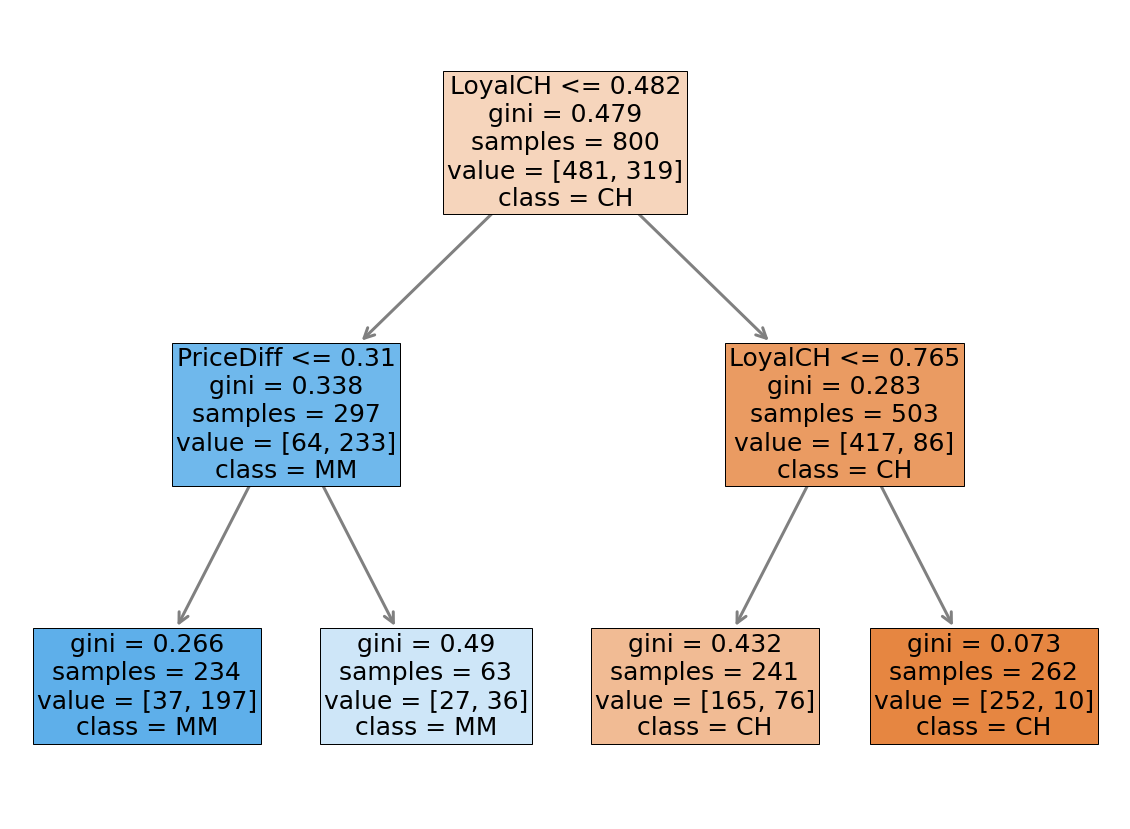

In [46]:

fig = plt.figure(figsize=(20,15))
plot = tree.plot_tree(model, 
                  feature_names = features,
                  class_names= {0:'CH',1:'MM'},
                  filled = True,
                  fontsize = 25)

for o in plot:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('grey')
        arrow.set_linewidth(3)

#### Question 5. Predict the response on the test data, and produce a confusion matrix comparing the testlabels to the predicted test labels. What is the test error rate? What is the value relatedto AUC?

In [85]:
print('Train confusion matrix: ', confusion_matrix(y_train, model.predict(X_train)))
print('Test confusion matrix: ', confusion_matrix(y_test, model.predict(X_test)))

Train confusion matrix:  [[417  64]
 [ 86 233]]
Test confusion matrix:  [[142  30]
 [ 24  74]]


In [136]:
X_test = test.drop(columns=['Purchase'])
X_test = pd.get_dummies(X_test, columns=['Store7'])
y_test = test['Purchase']
y_predict = model.predict(X_test)
print('Accuracy rate %.2f' % np.mean(y_predict == y_test))
pd.crosstab(y_predict, y_test)

Accuracy rate 0.80


Purchase,CH,MM
row_0,,
CH,142,24
MM,30,74


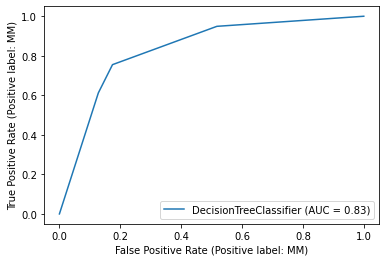

In [137]:
plot_roc_curve(model, X_test, y_test)

In [138]:
print(classification_report(y_test, predict, target_names=['CH','MM']))

              precision    recall  f1-score   support

          CH       0.86      0.83      0.84       172
          MM       0.71      0.76      0.73        98

    accuracy                           0.80       270
   macro avg       0.78      0.79      0.79       270
weighted avg       0.80      0.80      0.80       270



In [139]:
feature_importance = pd.DataFrame(model.feature_importances_, index = features).sort_values(0, axis = 0, ascending = False)
feature_importance.head(10)

,0
LoyalCH,0.956556
PriceDiff,0.043444
WeekofPurchase,0.000000
SalePriceCH,0.000000
Store7_No,0.000000
STORE,0.000000
ListPriceDiff,0.000000
PctDiscCH,0.000000
PctDiscMM,0.000000
SalePriceMM,0.000000


<AxesSubplot:>

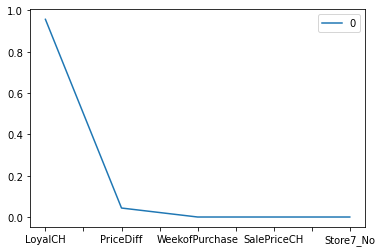

In [70]:
feature_importance.head(5).plot(kind='line')

#### Question 6. . Use the bagging approach in order to analyze this data. What test MSE do you obtain? Determine which variables are most important.

In [80]:
data.shape

(1070, 18)

In [ ]:
regr1 = RandomForestRegressor(max_features=13, random_state=1)
regr1.fit(X_train, y_train)

In [104]:
important_var = Counter(imp_var).most_common()
important_var

[]

#### 8.Compare your best tree with Logistic regression, Naive Bayes and Quadratic Discriminantanalysis using the ROC curve.

In [140]:
model_quad = QuadraticDiscriminantAnalysis()
model_quad.fit(X_train, np.ravel(y_train))
QDA = clf_quad.score(X_test, np.ravel(y_test))
print("Quadratic Discriminant Analysis:",QDA)


Quadratic Discriminant Analysis: 0.6888888888888889


In [141]:
clf_ld = LinearDiscriminantAnalysis()
clf_ld.fit(X_train, np.ravel(y_train))
LDA =clf_ld.score(X_test, np.ravel(y_test))
print("Linear Discriminant Analysis: ",LDA)

Linear Discriminant Analysis:  0.8222222222222222


In [142]:
clf_log = LogisticRegression(solver='lbfgs', max_iter=1000)
clf_log.fit(X_train, np.ravel(y_train))
LR = clf_log.score(X_test, np.ravel(y_test))
print("Logistic Regression: ",LR)

Logistic Regression:  0.8222222222222222


In [143]:
clf_bayes = BernoulliNB(binarize = True)
clf_bayes.fit(X_train, np.ravel(y_train))
BNN = clf_bayes.score(X_test, np.ravel(y_test))
print("BernoulliNB: ",BNN)

BernoulliNB:  0.6370370370370371


In [144]:
clf_gnb = GaussianNB()
clf_gnb.fit(X_train, np.ravel(y_train))
GSNB = clf_gnb.score(X_test, np.ravel(y_test))
print("GuassianNB", GSNB)

GuassianNB 0.7074074074074074


In [145]:
max(GSNB,BNN,LR,LDA,QDA)

0.8222222222222222

#### From the above results we can find the best score.

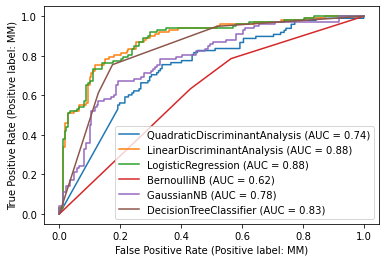

In [146]:
disp = plot_roc_curve(clf_quad, X_test, y_test)
plot_roc_curve(clf_ld, X_test, y_test, ax = disp.ax_)
plot_roc_curve(clf_log, X_test, y_test, ax = disp.ax_)
plot_roc_curve(clf_bayes, X_test, y_test, ax = disp.ax_)
plot_roc_curve(clf_gnb, X_test, y_test, ax = disp.ax_)
plot_roc_curve(model, X_test, y_test, ax = disp.ax_)

In [147]:
clf_log = LogisticRegression(solver='lbfgs', max_iter=1000)
clf_log.fit(X_train, np.ravel(y_train))
feature_importance_log = pd.DataFrame(np.abs(clf_log.coef_[0]), index = X_train.columns.tolist()).sort_values(0, axis = 0, ascending = False)
feature_importance_log.head(10)

,0
LoyalCH,5.298350
PriceDiff,1.419581
ListPriceDiff,0.834778
SalePriceMM,0.726469
SalePriceCH,0.693112
PriceCH,0.464851
SpecialCH,0.381622
PriceMM,0.369927
DiscMM,0.356542
DiscCH,0.228261


#### From the above function our must signicant value is the LoyalCH